# Credit Card Application Model

We'll start by preprocessing the data

## General Preprocessing

In [1]:
import pandas as pd

applicationRecord = pd.read_csv('application_record.csv')
creditRecord = pd.read_csv('credit_record.csv')

#Get counts of application record and credit record
print(creditRecord.count())
print("\n")
print(applicationRecord.count())

ID                1048575
MONTHS_BALANCE    1048575
STATUS            1048575
dtype: int64


ID                     438557
CODE_GENDER            438557
FLAG_OWN_CAR           438557
FLAG_OWN_REALTY        438557
CNT_CHILDREN           438557
AMT_INCOME_TOTAL       438557
NAME_INCOME_TYPE       438557
NAME_EDUCATION_TYPE    438557
NAME_FAMILY_STATUS     438557
NAME_HOUSING_TYPE      438557
DAYS_BIRTH             438557
DAYS_EMPLOYED          438557
FLAG_MOBIL             438557
FLAG_WORK_PHONE        438557
FLAG_PHONE             438557
FLAG_EMAIL             438557
OCCUPATION_TYPE        304354
CNT_FAM_MEMBERS        438557
dtype: int64


### Observations

There exist two obvious issues:
1. The number of application records is less than the number of credit records
2. The OCCUPATION_TYPE column has less values than the rest of the columns (suggesting NA values in play)

The first thing we'll begin doing is prune the columns we do not need to use in the applicationRecord set:
CODE_GENDER, CNT_CHILDREN, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS

In [2]:
#First we'll look at our columns before the drop
applicationRecord.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [3]:
#Drop the unnecessary columns and check our new set of columns
applicationRecord = applicationRecord.drop(columns=["CODE_GENDER", 
                                          "CNT_CHILDREN", 
                                          "FLAG_MOBIL", 
                                          "FLAG_WORK_PHONE", 
                                          "FLAG_PHONE",
                                          "FLAG_EMAIL",
                                          "OCCUPATION_TYPE",
                                          "CNT_FAM_MEMBERS"])
applicationRecord.columns

Index(['ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'],
      dtype='object')

### What next?

Now that we have the only columns we need, we can merge the two dataframes called "comprehensive", which includes the columns of both dataframes while also aligning the data from one ID to its corresponding data from both datasets

In [4]:
comprehensive = pd.merge(applicationRecord, creditRecord)
comprehensive.shape

(777715, 12)

In [5]:
comprehensive.head(20)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS
0,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,0,C
1,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-1,C
2,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-2,C
3,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-3,C
4,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-4,C
5,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-5,C
6,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-6,C
7,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-7,C
8,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-8,C
9,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,-9,C


### Observations
We have multiple entries for the same person, which is important to keep for the sake of better understanding when we throw the data into an unsupervised ML model. We may be able to gain insight into something like their balance or status in relation to some other data point we haven't yet considered. 

Moving from this,  our "DAYS_BIRTH" column is incredibly unintuitive for humans to read, so our next step will be to convert it to years. And because the we don't care about fractions of a year, we'll use floor division. Additionally we'll adjust the "DAYS_EMPLOYED" and "MONTHS_BALANCE" columns to positive values

In [6]:
#Divide the DAYS_BIRTH to years for our use
import numpy as np
comprehensive["DAYS_BIRTH"] = comprehensive["DAYS_BIRTH"].div(-365).apply(np.floor)

#We divided by -365 to get the values from negative to positive

In [7]:
#Rename DAYS_BIRTH to YEARS_OLD
comprehensive = comprehensive.rename(columns={"DAYS_BIRTH":"YEARS_OLD"})
comprehensive.head(100)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_OLD,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS
0,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,-4542,0,C
1,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,-4542,-1,C
2,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,-4542,-2,C
3,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,-4542,-3,C
4,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,-4542,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,-3051,-24,0
96,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,-3051,-25,X
97,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,-3051,-26,X
98,5008811,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,-3051,0,C


In [8]:
#Adjust "DAYS_EMPLOYED" and "MONTHS BALANCE"
comprehensive["DAYS_EMPLOYED"] = comprehensive["DAYS_EMPLOYED"].div(-1)
comprehensive["MONTHS_BALANCE"] = comprehensive["MONTHS_BALANCE"].div(-1)
comprehensive.head(100)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_OLD,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS
0,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,-0.0,C
1,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,1.0,C
2,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,2.0,C
3,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,3.0,C
4,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
95,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,3051.0,24.0,0
96,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,3051.0,25.0,X
97,5008810,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,3051.0,26.0,X
98,5008811,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.0,3051.0,-0.0,C


### Now what?
Let's check for null values to make sure data set is complete then export for usage in other models

In [9]:
comprehensive.isnull().sum()


ID                     0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
YEARS_OLD              0
DAYS_EMPLOYED          0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [10]:
#Unique ID vals
print(len(pd.unique(comprehensive["ID"])))

36457


## Diving into K-Means Clustering

We'll first need to modify the values of the "STATUS" columns to be numerical for the sake of clustering

In [11]:
#Replace "STATUS" column values with 1 (low risk), 2 (somewhat risky), and 3 (very risky)

replace_dict = {"C" : 1,
               "X": 1,
               "0": 0,
               "1": 0,
               "2": 0,
               "3": 0,
               "4": 0,
               "5": 0}

comprehensive.replace({"STATUS": replace_dict}, inplace=True)


Now that we have the data *mostly* prepped for clustering we can begin looking at the features we want to use for K-Means clustering. Using all the columns is unlikely to give usable data for analysis, so we'll cut it down to two feature inputs (columns): x and "STATUS", where x is a column that has some potential relevance to the "STATUS" column like "DAYS_EMPLOYED". The idea is to get the most relevant clusters possible for the most robust data analysis

In [12]:
# Preserve the data for future use
comprehensive.to_csv('updatedMergedApplicationCreditRecords.csv')

In [13]:
comprehensive.head(20)

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_OLD,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS
0,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,-0.0,1
1,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,1.0,1
2,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,2.0,1
3,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,3.0,1
4,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,4.0,1
5,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,5.0,1
6,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,6.0,1
7,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,7.0,1
8,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,8.0,1
9,5008804,Y,Y,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.0,4542.0,9.0,1


### Feature Selection
We'll start off with the following combinations to analyze for clustering:

1. AMT_INCOME_TOTAL and STATUS
2. NAME_INCOME_TYPE and STATUS
3. NAME_EDUCATION_TYPE and STATUS
4. DAYS_EMPLOYED and STATUS
5. MONTHS_BALANCE AND STATUS

#### AMT_INCOME_TOTAL and STATUS

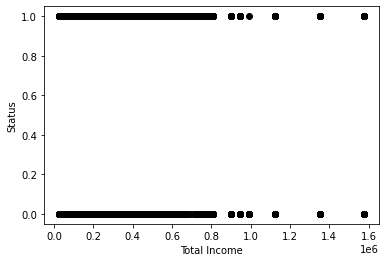

,0,1
0,0.258721,1.0
1,0.258721,1.0
2,0.258721,1.0
3,0.258721,1.0
4,0.258721,1.0


In [14]:
import random as rd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# AMT_INCOME_TOTAL and STATUS -> My initial guess would be little to no real value of information gained from AMT_INCOME_TOTAL

#Load and plot data to visually understand what data looks like
df1 = comprehensive[["AMT_INCOME_TOTAL", "STATUS"]].copy()
plt.scatter(df1["AMT_INCOME_TOTAL"], df1["STATUS"], c = "black")
plt.xlabel("Total Income")
plt.ylabel("Status")
plt.show()

#Scale the data for K-Means and output resulting scaled values
scaler = MinMaxScaler()
scaledDF1 = scaler.fit_transform(df1)
pd.DataFrame(scaledDF1).describe()
pd.DataFrame(scaledDF1).head()
#plt.scatter(scaledDF1["AMT_INCOME_TOTAL"], scaledDF1["STATUS"], c = "black")
#plt.xlabel("Total Income")
#plt.ylabel("Status")
#plt.show()

In [15]:
from sklearn.cluster import KMeans

#Initialize K-Means model and fit to scaled data
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(scaledDF1)

KMeans(n_clusters=2)

array([[0.25872093, 1.        ],
       [0.25872093, 1.        ],
       [0.25872093, 1.        ],
       ...,
       [0.05523256, 0.        ],
       [0.05523256, 0.        ],
       [0.05523256, 0.        ]])

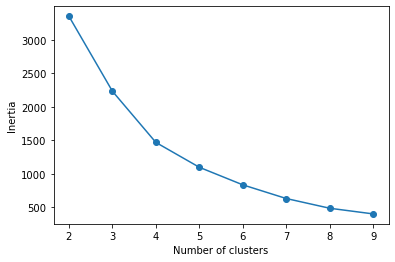

In [16]:
# Source: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
# In order to determine which number of clusters we should use, we'll run though a series of tests
# Takes some time to run (30-45 seconds)
output = []
for cluster in range(2, 10):
    kmeans = KMeans(n_clusters = cluster, init="k-means++")
    kmeans.fit(scaledDF1)
    output.append(kmeans.inertia_)
    
#Plot the data to visually determine number of clusters
graph = pd.DataFrame({"Cluster":range(2,10), "Output":output})
plt.plot(graph["Cluster"], graph["Output"], marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
scaledDF1

In [17]:
#Looks like 3 clusters would work well, so now we'll create the model using 3 clusters (Elbow Method)
kmeans = KMeans(n_clusters = 3, init="k-means++")
kmeans.fit(scaledDF1)
pred = kmeans.predict(scaledDF1)
pred

array([2, 2, 2, ..., 1, 1, 1])

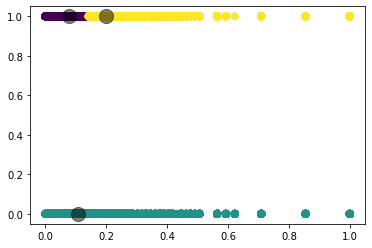

In [18]:
#Visualize the data
plt.scatter(scaledDF1[:, 0], scaledDF1[:, 1], c = pred, s = 50, cmap="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = "black", s = 200, alpha = 0.5)

#### NAME_INCOME_TYPE and YEARS_OLD

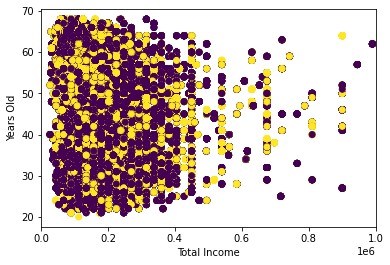

In [19]:
import random as rd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# AMT_INCOME_TOTAL and STATUS -> My initial guess would be little to no real value of information gained from AMT_INCOME_TOTAL

#Load and plot data to visually understand what data looks like
df1 = comprehensive[["AMT_INCOME_TOTAL", "YEARS_OLD"]].copy()
plt.scatter(df1["AMT_INCOME_TOTAL"], df1["YEARS_OLD"], c = comprehensive["STATUS"])
plt.xlim([0,1000000])
plt.xlabel("Total Income")
plt.ylabel("Years Old")
plt.show()

# Scale the data for K-Means and output resulting scaled values
scaler = MinMaxScaler()
scaledDF1 = scaler.fit_transform(df1)



Given how interlocked the data is with these two attributes, K means clustering wouldn't help sort the data here.

#### AMT_INCOME_TOTAL and DAYS_EMPLOYED

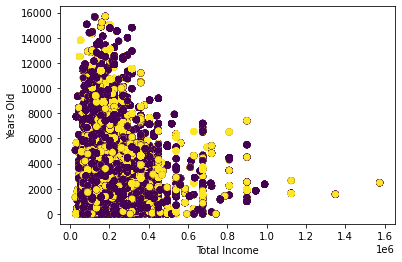

In [20]:
import random as rd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# AMT_INCOME_TOTAL and STATUS -> My initial guess would be little to no real value of information gained from AMT_INCOME_TOTAL

#Load and plot data to visually understand what data looks like
df1 = comprehensive[["AMT_INCOME_TOTAL", "DAYS_EMPLOYED"]].copy()
df1["DAYS_EMPLOYED"].replace({"-365243": "0"}, inplace=True)
df1.loc[df1['DAYS_EMPLOYED'] < 0, 'DAYS_EMPLOYED'] = 0
plt.scatter(df1["AMT_INCOME_TOTAL"], df1["DAYS_EMPLOYED"], c = comprehensive["STATUS"])
plt.xlabel("Total Income")
plt.ylabel("Years Old")
#plt.ylim([0,10000])
plt.show()



Same with this set of data, there is too much interlocking to make use of K means clustering with this specific dataset. The relationship between the acceptance and failure is too complex for K means clustering with these two attributes.